In [1]:
from sstadex import Macromodel, bfs, Primitive, dfs, simplediffpair, cs_pmos, cm_pmos
import numpy as np
from sympy import Symbol
import matplotlib.pyplot as plt

XSCHEM_RCFILE = "/opt/pdks/sky130A/libs.tech/xschem/xschemrc"
SPICE_DIR = "./spice/"
OUTPUT_DIR = "./output/"
XSCHEM_DIR = "./xschem/"

# 1 stage Miller OTA

In [2]:
OTA_macro = Macromodel(name = "ota",
                       macromodel_parameters={Symbol('Ra'): np.linspace(100, 100000, 5),
                                              Symbol('gma'): np.linspace(0.001, 0.1, 5)},
                       req_tfs = [["vout", "vpos"]],
                       electrical_parameters={Symbol("gdif_2"): Symbol("gdif_1"),
                                              Symbol("Rdif_2"): Symbol("Rdif_1"),
                                              Symbol("V1"): 0,
                                              Symbol("V_n"): 0,
                                              Symbol("V_p"): 1,
                                              Symbol("I2"): 0},
                        output = [Symbol('W'),
                                  Symbol('mesh')])

vs = np.linspace(0.1, 0.8, 5)
vds_diffpar = 1.2 - vs
vgs_diffpar = 0.9 - vs

parametros_electricos = {'Vds': vds_diffpar, 'Vsb': 0, 'Vgs': vgs_diffpar}

diffpair_primitive = simplediffpair(netlist='simplediffpair.spice', type='nmos', inputs={'vds_lut': (0.1, 1.2, 0.01), 'vgs_lut': (0.1, 1.8, 0.01), 'vds': parametros_electricos['Vds'], 'vgs': parametros_electricos['Vgs'], 'il': 20e-6,
                  'length': [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6], '2d_var': ['vds', 'vgs']})

diffpair_primitive.build()

diffpair_primitive.parameters = {Symbol("Rdif_1"): np.asarray(diffpair_primitive.Ro).flatten(), 
                                 Symbol("gdif_1"): np.asarray(diffpair_primitive.gm).flatten()}
diffpair_primitive.output = {Symbol('W'): np.asarray(diffpair_primitive.W).flatten(),
                             Symbol('mesh'): np.asarray(diffpair_primitive.mesh)}

active_load = Macromodel(name = "activeLoad",
                         macromodel_parameters = {Symbol("Raload_1"): np.linspace(100, 100000, 5),
                                                  Symbol("Raload_2"): np.linspace(100, 100000, 5),
                                                  Symbol("gaload"): np.linspace(0.001, 0.1, 5)})

current_source = Macromodel(name = "currentSource")


OTA_macro.submacromodels = [active_load, current_source]
OTA_macro.primitives = [diffpair_primitive]


class test:
    def __init__(self) -> None:
        pass
    def eval(funct):
        return {"eval": funct}

#################### PSRR #######################
psrr = test()
psrr.tf = ("vout", "vpos")
psrr.parametros = {Symbol("gdif_2"): Symbol("gdif_1"),
                   Symbol("Rdif_2"): Symbol("Rdif_1"),
                   Symbol("V1"): 0,
                   Symbol("V_n"): 0,
                   Symbol("V_p"): 1,
                   Symbol("I2"): 0}
psrr.variables = {}
psrr.out_def = {"eval": psrr.tf}

OTA_macro.especificaciones = [psrr]

results, axes, primoutputs = dfs(OTA_macro)

vds
vgs
1
Macro results of:  ota
Running MNA... 



   X server connection failed, although DISPLAY shell variable is set.
   A possible reason is that the X server is not running or DISPLAY shell variable
   is incorrectly set.
   Starting Xschem in text only mode.



A:  Matrix([[1/Rdif_2 + 1/Raload_2, -gdif_2 - 1/Rdif_2, gdif_2, 0, 0, -1/Raload_2, 0, 0, 0], [-1/Rdif_2, gdif_1 + gdif_2 + 1/Rdif_2 + 1/Rdif_1, -gdif_2, -1/Rdif_1, -gdif_1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [gaload, -gdif_1 - 1/Rdif_1, 0, 1/Rdif_1 + 1/Raload_1, gdif_1, -gaload - 1/Raload_1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [-gaload - 1/Raload_2, 0, 0, -1/Raload_1, 0, gaload + 1/Raload_2 + 1/Raload_1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0]])
[v1, v2, v3, v4, v5, v6, I_V1, I_V_n, I_V_p]
{I_V1: -I2, I_V_n: 0, I_V_p: 0, v1: (-I2*Raload_1*Raload_2*Rdif_2*gdif_2 - I2*Raload_1*Raload_2 - I2*Raload_2*Rdif_1*Rdif_2*gdif_2 - I2*Raload_2*Rdif_1 + Raload_1*Raload_2*Rdif_2*V1*gaload*gdif_2 + Raload_1*Raload_2*V1*gaload + Raload_1*Rdif_2*V1*gdif_2 + Raload_1*V1 - Raload_2*Rdif_1*Rdif_2*V_n*gdif_1*gdif_2 + Raload_2*Rdif_1*Rdif_2*V_p*gdif_1*gdif_2 + Raload_2*Rdif_1*V_p*gdif_1 + Raload_2*Rdif_2*V1*gdif_2 - Raload_2*Rdif_2*V_n*gdif_2


   X server connection failed, although DISPLAY shell variable is set.
   A possible reason is that the X server is not running or DISPLAY shell variable
   is incorrectly set.
   Starting Xschem in text only mode.



A:  Matrix([[1/Rdif_2 + 1/Raload_2, -gdif_2 - 1/Rdif_2, gdif_2, 0, 0, -1/Raload_2, 0, 0, 0], [-1/Rdif_2, gdif_1 + gdif_2 + 1/Rdif_2 + 1/Rdif_1, -gdif_2, -1/Rdif_1, -gdif_1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [gaload, -gdif_1 - 1/Rdif_1, 0, 1/Rdif_1 + 1/Raload_1, gdif_1, -gaload - 1/Raload_1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [-gaload - 1/Raload_2, 0, 0, -1/Raload_1, 0, gaload + 1/Raload_2 + 1/Raload_1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0]])
[v1, v2, v3, v4, v5, v6, I_V1, I_V_n, I_V_p]
{I_V1: -I2, I_V_n: 0, I_V_p: 0, v1: (-I2*Raload_1*Raload_2*Rdif_2*gdif_2 - I2*Raload_1*Raload_2 - I2*Raload_2*Rdif_1*Rdif_2*gdif_2 - I2*Raload_2*Rdif_1 + Raload_1*Raload_2*Rdif_2*V1*gaload*gdif_2 + Raload_1*Raload_2*V1*gaload + Raload_1*Rdif_2*V1*gdif_2 + Raload_1*V1 - Raload_2*Rdif_1*Rdif_2*V_n*gdif_1*gdif_2 + Raload_2*Rdif_1*Rdif_2*V_p*gdif_1*gdif_2 + Raload_2*Rdif_1*V_p*gdif_1 + Raload_2*Rdif_2*V1*gdif_2 - Raload_2*Rdif_2*V_n*gdif_2


   X server connection failed, although DISPLAY shell variable is set.
   A possible reason is that the X server is not running or DISPLAY shell variable
   is incorrectly set.
   Starting Xschem in text only mode.



A:  Matrix([[1/Rdif_2 + 1/Raload_2, -gdif_2 - 1/Rdif_2, gdif_2, 0, 0, -1/Raload_2, 0, 0, 0], [-1/Rdif_2, gdif_1 + gdif_2 + 1/Rdif_2 + 1/Rdif_1, -gdif_2, -1/Rdif_1, -gdif_1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [gaload, -gdif_1 - 1/Rdif_1, 0, 1/Rdif_1 + 1/Raload_1, gdif_1, -gaload - 1/Raload_1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [-gaload - 1/Raload_2, 0, 0, -1/Raload_1, 0, gaload + 1/Raload_2 + 1/Raload_1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0]])
[v1, v2, v3, v4, v5, v6, I_V1, I_V_n, I_V_p]
{I_V1: -I2, I_V_n: 0, I_V_p: 0, v1: (-I2*Raload_1*Raload_2*Rdif_2*gdif_2 - I2*Raload_1*Raload_2 - I2*Raload_2*Rdif_1*Rdif_2*gdif_2 - I2*Raload_2*Rdif_1 + Raload_1*Raload_2*Rdif_2*V1*gaload*gdif_2 + Raload_1*Raload_2*V1*gaload + Raload_1*Rdif_2*V1*gdif_2 + Raload_1*V1 - Raload_2*Rdif_1*Rdif_2*V_n*gdif_1*gdif_2 + Raload_2*Rdif_1*Rdif_2*V_p*gdif_1*gdif_2 + Raload_2*Rdif_1*V_p*gdif_1 + Raload_2*Rdif_2*V1*gdif_2 - Raload_2*Rdif_2*V_n*gdif_2

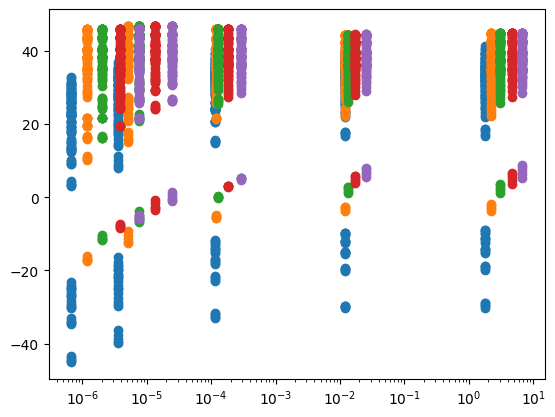

In [36]:
for i in range(5):
    plt.scatter(np.tile(diffpair_primitive.W, 125).reshape(5, 625)[i], results[0].reshape(5, 625)[i])
    plt.xscale("log")

In [8]:
primoutputs = np.asarray(primoutputs[0][0])
W = np.tile(primoutputs, 125)
L = np.tile(diffpair_primitive.L, 125)

area = W+L

plt.scatter(area.flatten(), results[0].transpose().flatten())
plt.xscale('log')

IndexError: list index out of range

In [106]:
W_2 = W.reshape(-1, 125)
print(W_2.shape)
L_2 = L.reshape(-1, 125)
print(L_2.shape)
results_2 = results[0].transpose()
print(results_2.shape)

print(results[0][120][15])
print(W_2[15][120])
print(L_2[15][120]) 

(25, 125)
(25, 125)
(25, 125)
41.44612959320696
7.457589939425457e-06
6.4e-06


# OTA diffpair and active load as primitives

In [14]:
ota_cm_pmos = cm_pmos(name='ota_cm_pmos', netlist='pmos_cm.spice', type='pmos', inputs={'vds_lut': -0.6, 'vgs_lut': (-1.8, -0.1, 0.01), 'vgs': -0.6, 'il': 20e-6,
                  'length': [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6], '2d_var': ['length', 'vgs']})
ota_cm_pmos.build()

ota_cm_pmos.parameters = {Symbol("Raload_1"): np.asarray(ota_cm_pmos.Ro).flatten(),
                          Symbol("Raload_2"): 1/np.asarray(ota_cm_pmos.gm).flatten(),
                          Symbol("gaload"): np.asarray(ota_cm_pmos.gm).flatten()}

length
vgs
0


In [15]:
OTA_macro.submacromodels = []
OTA_macro.primitives = [diffpair_primitive, ota_cm_pmos]

results_1, axes_1, a = dfs(OTA_macro)

Macro results of:  ota
Running MNA... 
dict_keys([<sstadex.models.primitives.simplediffpair object at 0x7f3143f9ff40>, <sstadex.models.primitives.cm_pmos object at 0x7f3140b7e620>])


In [10]:
results_1[0] = np.asarray(results_1[0]).flatten()
results_1[0].shape

Ra = []
gma = []

for i in axes_1[0][0]:
        Ra.append(i)
for i in axes_1[0][1]:
        gma.append(i)

len(Ra)
len(gma)

gain = 20*np.log10(np.asarray(Ra)*np.asarray(gma))

plt.scatter(gain, results_1[0].flatten())

(125,)

In [97]:
i = 4
j = 22

print(results_1[0].reshape(5, 25)[i,j])
print(axes_1[0][0][i*j])
print(axes_1[0][1][i*j])
print(axes_1[0][2][i*j])
print(axes_1[0][3][i*j])
print(axes_1[0][4][i*j])
print(np.tile(diffpair_primitive.W, 5).reshape(5, 25)[i,j])
print(np.tile(diffpair_primitive.L, 5).reshape(5, 25)[i,j])
print(ota_cm_pmos.W.repeat(25).reshape(5, 25)[i,j])
print(ota_cm_pmos.L.repeat(25).reshape(5, 25)[i,j])


43.86623544194539
164032.77908139848
0.0005893861966814314
965620.3477706314
4551.56315538315
0.0002197047400775482
0.00029366378763092716
6.4e-06
0.00027288429229105864
6.4e-06


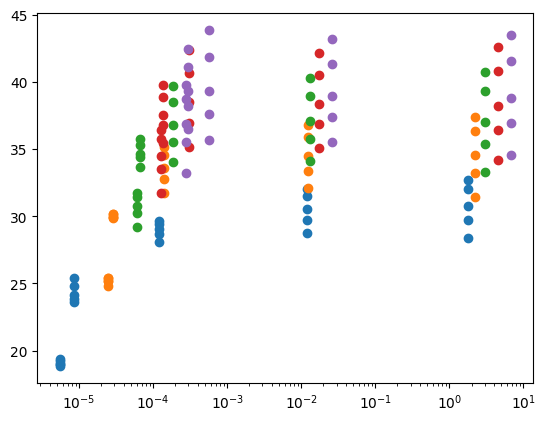

In [16]:
for i in range(5):
    plt.scatter(np.tile(diffpair_primitive.W, 5).reshape(5, 25)[i]+ota_cm_pmos.W.repeat(25).reshape(5, 25)[i], results_1[0].reshape(5, 25)[i])
    plt.xscale("log")

In [ ]:
pt = Primitive(name = "passTransistor", 
               parameters = {Symbol('gm_pt'): np.linspace(0.001, 0.1, 5), 
                             Symbol('Ro_pt'): np.linspace(100, 100000, 5)})

LDO_macro = Macromodel(name = "ldo", 
                       submacromodels = [OTA_macro],
                       req_tfs = [["vout", "net1"]], 
                       primitives = [pt], 
                       electrical_parameters={Symbol("V1"): 1, 
                                              Symbol("V2"): 0, 
                                              Symbol("R2"): 100000, 
                                              Symbol("R3"): 300000})

results, axes = dfs(LDO_macro)

In [389]:
a = np.asarray([np.asarray([1, 2]), np.asarray([3, 4])])
b = np.asarray([np.array([5, 6, 7]), np.array([8, 9, 10]), np.array([11, 12, 13])])

c = np.meshgrid(a, b)
d = np.meshgrid(a, b, indexing="ij")

In [390]:
c = np.asarray(c)
d = np.asarray(d)
print(c.shape)
print(d.shape)

(2, 9, 4)
(2, 4, 9)
